<a href="https://colab.research.google.com/github/swipe-left-project/spotify.github.io/blob/main/Notebook_Playlist_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis: Studying the playlists and radios of artists from Pop Urbaine, Grand Hit, and Who We Be (UK)



Our analysis section attempts to dissect datasets containing information from playlists from Spotify to reveal biases or abnormalities. The dataset is either generated by using the Spotify API (using code from webpage cited below) or else using Organize Your Music, which is an app that organises your music by genre. 

Three playlists are considered: Pop Urbaine, Grand Hit, and Who We Be. Furthermore, radios are generated from artists within these playlists so we have a wider dataset to work with. 
The following analysis is divided into 3 parts
1. Studying the frequency of an artists within a playlist
2. Studying the frequency of genres within playlists
3. Studying the frequency of artists in genre-specific radios
4. Studying the popularity of the artists who appear most frequently in genre-specific radios


## Justifying Comparison of Playlists: Similarity between Pop Urbaine and Who We Be

Pop Urbaine (French) and Who We Be (UK English) were chosen as both playlists seemed to contain similar 'vibes'. In this subsection, we compare the averages of the numerical figures associated with the tracks in the playlists - such as beats per minute (bpm), energy, danceability, etc. - to show empirically that the playlists are similar. This is done by making a spider graph of average values across the two playlists. The code for this was taken from: https://towardsdatascience.com/discovering-your-music-taste-with-python-and-spotify-api-b51b0d2744d


In [ ]:
import pandas as pd

In [ ]:
popurbaine_radar = pd.read_excel('radar.xlsx', usecols =['acous','bpm', 'dB', 'dnce', 'live', 'nrgy', 'spch', 'val'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import math 

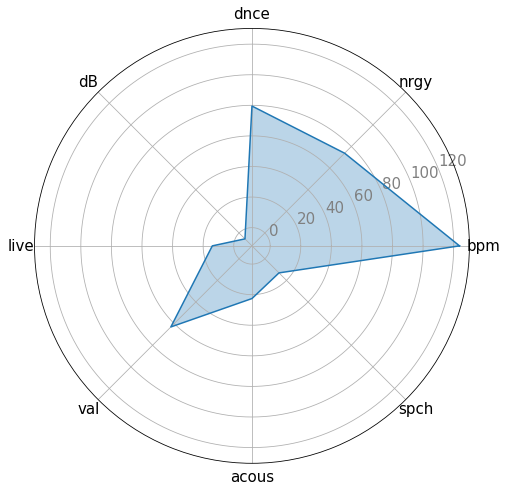

In [ ]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(popurbaine_radar.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(popurbaine_radar.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*math.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Pop Urbaine Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()


In [ ]:
whowebe_radar = pd.read_excel('radar_uk.xlsx', usecols =['acous','bpm', 'dB', 'dnce', 'live', 'nrgy', 'spch', 'val'])

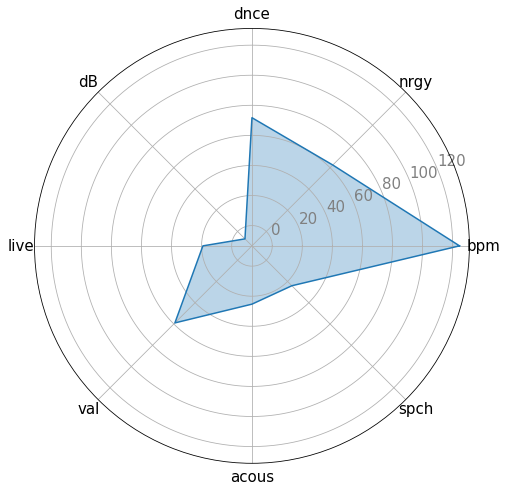

In [ ]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(whowebe_radar.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value_2=list(whowebe_radar.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value_2+=value_2[:1]
# calculate angle for each category
angles=[n/float(N)*2*math.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value_2)
plt.fill(angles,value_2,alpha=0.3)

# plt.title('Who We Be Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()


# I. Frequency of Artists: Pop Urbaine, Who We Be, Grand Hit


#### In this section, we look at how frequently artists appear in the three playlists chosen. This is done to show whether the playlists strongly favour any particular artists or allow a variety. For this part, we've drawn the Python code from the webpage : https://medium.com/swlh/find-your-favorite-artists-in-spotify-playlists-with-python-420e70abd97bv


In [ ]:
#Installing spotipy.  
# Spotipy is a lightweight Python library for the Spotify Web API which allows us to 
# get full access to all of the music data provided by the Spotify platform.
!pip install spotipy

In [ ]:
# We import spotipy and use our credentials and token
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = '0ec142907dc2406988bc4b7fad4ff9e9'
secret = '47d26c4feb10474cb970df9af2633685'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
#We import pandas
import pandas as pd


In [ ]:
from pprint import pprint

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

pl_id = 'spotify:playlist:37i9dQZF1DWYVURwQHUqnN'
offset = 0

while True:
    response = sp.playlist_items(pl_id,
                                 offset=offset,
                                 fields='items.track.id,total',
                                 additional_types=['track'])
    
    if len(response['items']) == 0:
        break
    
    pprint(response['items'])
    offset = offset + len(response['items'])
    print(offset, "/", response['total'])

[{'track': {'id': '5ioieZofgvXQK70RFhVohl'}},
 {'track': {'id': '2O9enJqAqs46tfBlGhLsnW'}},
 {'track': {'id': '2s1lS0DxcxTB8Y6oFgVKqW'}},
 {'track': {'id': '2kUKeN9ZpYHqfBjB8Gphb2'}},
 {'track': {'id': '27Z3UdqvdAhtJlWBMoDjBD'}},
 {'track': {'id': '3IR9wKWxI0TK1DLXvZq8uQ'}},
 {'track': {'id': '7vX1e8Tcj1cl20HoWaDI4h'}},
 {'track': {'id': '13tc5dzElXbImNjDzz4E2B'}},
 {'track': {'id': '14M6BbiHt2w9KHVvoIUIUF'}},
 {'track': {'id': '0hYRtveIf2cy9PgFUk4uDm'}},
 {'track': {'id': '19dD5F9Mu5DvraJr0f5eho'}},
 {'track': {'id': '2mIfMDTR6pNa3iWne56HGe'}},
 {'track': {'id': '2XLPtKom1ixf7IJgPsPAvp'}},
 {'track': {'id': '6MdtCALjOioiBPXeUIqr0D'}},
 {'track': {'id': '0igELlHJcgbgEtgsTmj9t0'}},
 {'track': {'id': '3BFlHQD1nt7vHXmh0SswCO'}},
 {'track': {'id': '5csxKPX4HuN8UDEdHUxcqz'}},
 {'track': {'id': '0cbPzY8hsoDJFxHRElgF4c'}},
 {'track': {'id': '3bGGvbwbhq9kIMhHaXBdYL'}},
 {'track': {'id': '1isJQKjH3cFutccvz3jrCD'}},
 {'track': {'id': '5aSLIxdiQAgfTGsqGwgivC'}},
 {'track': {'id': '3eGuT5Bs8s9CGQb

In [ ]:
from typing import List, Dict

In [ ]:
# We define a function which allows us to get the playlist length 
def get_pl_length(sp: spotipy.client.Spotify, pl_uri: str) -> int:
    return sp.playlist_tracks(
        pl_uri,
        offset=0,
        fields="total"
    )["total"]

In [ ]:
# We extract all the information about each artist featured on the playlist 

def get_tracks_artist_info(sp: spotipy.client.Spotify, pl_uri: str) -> List[List[Dict]]:
    artists_info = list()
    # We make sure to start retrieving tracks from the very beginning of the playlist: 
    offset = 0
    pl_length = get_pl_length(sp, pl_uri)

    # We create a loop to keep retrieving info until we reach the end of the playlist
    while offset != pl_length:
        # Get the next batch of tracks
        pl_tracks = sp.playlist_tracks(
            pl_uri,
            offset=offset,
            fields="items.track"
        )

        # We create and obtain a list, with the info about each artist
        # and append it to the main list
        [artists_info.append(pl_item["track"]["artists"])
            for pl_item in pl_tracks["items"]]

        # We update the offset
        offset += len(pl_tracks["items"])

    return artists_info

In [ ]:
# We create a function which allows us to count artists within the playlist 
def get_artist_counts(artists_info: List[List[Dict]]) -> Dict[str, int]:
    artist_counts = dict()

    # Loop through the lists of artist information
    for track_artists in artists_info:
        # Loop through the artists associated with the current track
        for artist in track_artists:
            # Update the current artist's frequency
            artist_name = artist["name"]
            if artist_name in artist_counts:
                artist_counts[artist_name] += 1
            else:
                artist_counts[artist_name] = 1

    return artist_counts

In [ ]:
from os import environ

In [ ]:
# We create a function which allows us to get access to Spotipy
def authenticate(cliend_id: str, client_secret: str) -> spotipy.client.Spotify:
    sp = spotipy.Spotify(
        client_credentials_manager=SpotifyClientCredentials(
            client_id=cliend_id,
            client_secret=client_secret
        )
    )

    return sp


In [ ]:
# We code a function which allows us to produce a csv file with the artists

def save_artists_csv(artists_counts: Dict[str, int]) -> None:
    # We create a list with the artists featured in the playlist 
    artists = list(artists_counts.keys())
    # We calculate the frequencies of the artists
    frequencies = [freq for artist, freq in artists_counts.items()]
    # We constitute a dictionary for the dataframe
    data = {
        "Artist": artists,
        "Frequency": frequencies
    }
    # We create the dataframe and export it as CSV
    new_df = pd.DataFrame(data=data)
    new_df.to_csv("artists_frequencies.csv", index=False)


if __name__ == "__main__":
    # We get the credentials from environment variables
    CLIENT_ID = environ.get("SPOTIFY_CLIENT_ID")
    CLIENT_SECRET = environ.get("SPOTIFY_CLIENT_SECRET")
    # We get a Spotify authenticated instance
    sp_instance = authenticate(cid, secret)


In [ ]:
 # We load the Spotify Playlist Pop Urbaine 
pl_uri = "spotify:playlist:37i9dQZF1DWYVURwQHUqnN"

# We extract the artist information for all tracks of the playlist
artists_info = get_tracks_artist_info(sp_instance, pl_uri)

# We count the artists 
artists_counts = get_artist_counts(artists_info)

# We export the artist frequencies in a CSV document
save_artists_csv(artists_counts)

In [ ]:
# We produce a chart, which allows us to plot the artists with the highest frequency


import plotly.express as px
import plotly.graph_objects as go

# We load and sort the data in descending order 
def pre_process_data(file_name: str) -> pd.DataFrame:
    dataset = pd.read_csv(file_name)

    # We sort the dataset by "Frequency", in descending order, and reset the indices
    dataset = dataset.sort_values(
        "Frequency",
        ascending=False
    ).reset_index(drop=True)

    return dataset


# We plot a column chart with the 10 most frequent artists
def plot_column_chart(data: pd.DataFrame) -> None:
    # We plot the column chart (Artists vs Frequency)
    fig = px.bar(
        data.head(n=10), x="Artist", y="Frequency",
        text="Frequency",
        title=f"Top 10 Artists (out of {data.shape[0]} artists)"
    )

    # We add the data labels inside the columns
    fig.update_traces(
        textposition="inside"
    )



    # We display the finalized plot
    fig.show()


if __name__ == "__main__":
    # CSV with the data
    file_name = "artists_frequencies.csv"
    # Load the data
    dataset = pre_process_data(file_name)
    # Plot the data in a column chart
    plot_column_chart(dataset)


We apply the same code to the UK Playlist Who We Be

In [ ]:
 # Playlist URI to look up
pl_uri = "spotify:playlist:37i9dQZF1DXcDoDDetPsEg"
    # Get the artist information for all tracks of the playlist
artists_info = get_tracks_artist_info(sp_instance, pl_uri)

artists_counts = get_artist_counts(artists_info)

    # Save the artist frequencies in a CSV
save_artists_csv(artists_counts)

In [ ]:
def pre_process_data(file_name: str) -> pd.DataFrame:
    dataset = pd.read_csv(file_name)

    dataset = dataset.sort_values(
        "Frequency",
        ascending=False
    ).reset_index(drop=True)

    return dataset


def plot_column_chart(data: pd.DataFrame) -> None:
  
    fig = px.bar(
        data.head(n=10), x="Artist", y="Frequency",
        text="Frequency",
        title=f"Top 10 Artists (out of {data.shape[0]} artists)"
    )

    fig.update_traces(
        textposition="inside"
    )



    fig.show()


if __name__ == "__main__":
    file_name = "artists_frequencies.csv"
    dataset = pre_process_data(file_name)
    plot_column_chart(dataset)

We apply the same method to the French Playlist Grand Hit 

In [ ]:
 # Playlist URI to look up
pl_uri = "spotify:playlist:37i9dQZF1DXcSPhLAnCjoM"
    # Get the artist information for all tracks of the playlist
artists_info = get_tracks_artist_info(sp_instance, pl_uri)

artists_counts = get_artist_counts(artists_info)

    # Save the artist frequencies in a CSV
save_artists_csv(artists_counts)

def pre_process_data(file_name: str) -> pd.DataFrame:
    dataset = pd.read_csv(file_name)

    dataset = dataset.sort_values(
        "Frequency",
        ascending=False
    ).reset_index(drop=True)

    return dataset


def plot_column_chart(data: pd.DataFrame) -> None:
  
    fig = px.bar(
        data.head(n=10), x="Artist", y="Frequency",
        text="Frequency",
        title=f"Top 10 Artists (out of {data.shape[0]} artists)"
    )

    fig.update_traces(
        textposition="inside"
    )



    fig.show()


if __name__ == "__main__":
    file_name = "artists_frequencies.csv"
    dataset = pre_process_data(file_name)
    plot_column_chart(dataset)

### Takeaway:

We can see when looking at these three playlists, that Pop Urbaine seems to be more concentrated and heavily favours two artists (who appear six times), as opposed to its UK equivalent, and French Grand Hit. The highest number of times the same artist comes up in the latter two playlists is three. 

# II. Genre Classification and Labels 


#### In this part, we look into the genre classification within the three playlists that we have been studying. We extract the information from the Spotify API powered website organize.yourmusic.

#### The genre that we export is the top-genre associated with the artist. For the most part, artists are associated with a second, or a third subgenre. 

Importing the data set and creating dataframes for playlists

In [ ]:
#Importing the excel sheet to create the main dataframe
dfgenres = pd.read_excel('genretable.xlsx')

#Creating smaller dataframes that are easier to work with for each playlist.
#Dataframes are used here instead of taking columns as lists since it is easier to delete NaN values this way. 
popurbaine = pd.read_excel('genretable.xlsx', usecols=['POP URBAINE'])
popurbaine = popurbaine.dropna()

whowebe = pd.read_excel('genretable.xlsx', usecols=['WHO WE BE'])
whowebe = whowebe.dropna()

grandhit = pd.read_excel('genretable.xlsx', usecols=['GRAND HIT'])
grandhit = grandhit.dropna()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creating a function to count the genres in the playlists

In [ ]:
def count_genres(genre_df):
  genre_dict = {}
  for i in range(len(genre_df)):
    if genre_df.iloc[i][0] in genre_dict:
      genre_dict[genre_df.iloc[i][0]] += 1
    else:
      genre_dict[genre_df.iloc[i][0]] = 1
  return genre_dict

Analysing the Pop Urbaine playlist using the count_genres() function

In [ ]:
genre_fr = count_genres(popurbaine)
genre_fr

{'arabic hip hop': 2,
 'drill francais': 1,
 'francoton': 37,
 'french hip hop': 6,
 'pop urbaine': 1,
 'rap francais': 2}

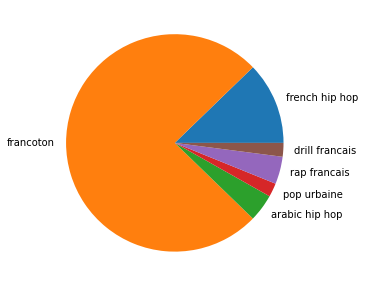

In [ ]:
# Get the Keys and store them in a list
labels = list(genre_fr.keys())

# Get the Values and store them in a list
values = list(genre_fr.values())

import matplotlib.pyplot as plt
w = 5
h = 5

plt.figure(figsize=(w, h))
plt.pie(values, labels=labels)
plt.show()


Analysing the Who We Be (UK) playlist using the count_genres() function

In [ ]:
genre_uk = count_genres(whowebe)
genre_uk

{'afro dancehall': 2,
 'afro r&b': 1,
 'afropop': 1,
 'afroswing': 4,
 'alternative r&b': 3,
 'atl hip hop': 2,
 'aussie drill': 2,
 'brooklyn drill': 1,
 'canadian hip hop': 2,
 'chill r&b': 1,
 'dance pop': 1,
 'dancehall': 1,
 'dirty south rap': 1,
 'drill brasileiro': 2,
 'grime': 1,
 'indie r&b': 1,
 'london rap': 4,
 'manchester hip hop': 1,
 'nottingham hip hop': 1,
 'pop': 1,
 'pop rap': 1,
 'rap': 1,
 'uk drill': 4,
 'uk hip hop': 11}

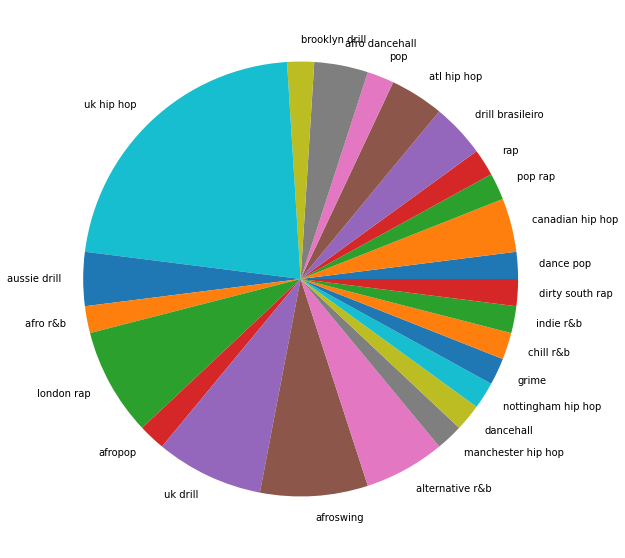

In [ ]:
# Get the Keys and store them in a list
labels = list(genre_uk.keys())

# Get the Values and store them in a list
values = list(genre_uk.values())
w = 10
h = 10

plt.figure(figsize=(w, h))
plt.pie(values, labels=labels)
plt.show()

Analysing the Grand Hit playlist using the count_genres() function

In [ ]:
genre_hit = count_genres(grandhit)
genre_hit

{'belgian pop': 2,
 'chanson': 13,
 'eurovision': 3,
 'francoton': 19,
 'french indie pop': 5,
 'french pop': 1,
 'new french touch': 1}

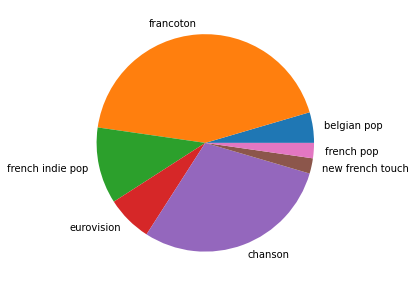

In [ ]:
# Get the Keys and store them in a list
labels = list(genre_hit.keys())

# Get the Values and store them in a list
values = list(genre_hit.values())

w = 5
h = 5

plt.figure(figsize=(w, h))
plt.pie(values, labels=labels)
plt.show()

### Takeaways:

The Who We Be playlist shows a diverse range of genres/sub-genres that cater to different niches of rap and hip hop music in the UK. This can be credited to their decision to relinquish the use of catch-all terms such as "urban music".

In France on the other hand, we can see that in both playlists, there are fewer labels, with a more asymmetric distribution : in the Pop Urbaine playlist, the "francoton" genre appears 37 times out of 50, and characterises almost 75% of the tracks, and in the Grand Hit playlist, it appears 19 times out of 44, characterising almost 50% of the tracks.  

From this first analysis of these three genre-specific playlists, we can see that the UK is characterised by the use of narrower labels to refer to genres: genre are broken down into cities, sub-types of hip hop, new music genres that fuse diaspora music (afroswing, afro rnb and afro dancehall). In France, genres appear to be less diverse. We can see that in the two playlists that we have studied, there is a recurring label which crowds out other genres: the label 'francoton'. 

The analysis of these playlists has allowed us to look at the variety in genre classification. As these playlist are editorial and created by human beings, we will look at the effect that this classification may have on the recommendation algorithm.

# III. Recommendation algorithm: Delving into Artists Radios

#### In order to analyse the implication of the use of catch all terms on the recommendation algorithm we look into the "Artist Radio" functionality of Spotify. Artist radios are playlists which recommend 50 tracks when given an artist. These playlists include a few songs made by this artist, and other tracks made by similar artists.


To do this, we take 5 random artists from the three playlists analysed and import the playlists that their radios generate. An online random number generator was used to pick artists.
Our hypothesis is that the "pop urbaine" artists' radios may show lower variability and concentrate on a few popular names whereas UK artists' radios and Grand Hit playlist could show more niche artists.


Importing random artist radio data from excel and creating dataframes classified by playlist the artist was found in

In [ ]:
import pandas as pd
artistradio = pd.read_excel('randomartists.xlsx')
artistradio = artistradio.dropna()

popurbaineradio = (artistradio['POP URBAINE'])
whoweberadio = (artistradio['WHO WE BE'])
grandhitradio = (artistradio['GRAND HIT'])

Function to count the artists in the radio

In [ ]:
def count_radioartists(radio):
  radioartists = {}
  for j in radio:
    if j in radioartists:
      radioartists[j] += 1
    else:
      radioartists[j] = 1
  return radioartists

Functions to count artists that appear once and above a threshold of 7:

In [ ]:
def artists_once(radioartists):
  artists_1 = {}
  for k in radioartists:
    if radioartists.get(k) == 1:
      artists_1[k] = radioartists.get(k)
  return artists_1

def artists_above_7(radioartists):
  artists_7 = {}
  for l in radioartists:
    if radioartists.get(l) >= 7:
      artists_7[l] = radioartists.get(l)
  return artists_7

Analysing the radios of random artists from Pop Urbaine 

In [ ]:
freq_popurbaineradio = count_radioartists(popurbaineradio)
popurbaine_once = artists_once(freq_popurbaineradio)
popurbaine_7 = artists_above_7(freq_popurbaineradio)

print("The analysis of the radios linked to artists from Pop Urbaine shows " + str(len(freq_popurbaineradio)) + " artists in total from 250 tracks.")
print("There are " + str(len(popurbaine_once)) + " artists that appear once.")
print("There are " + str(len(popurbaine_7)) + " artists that appear more than 7 times.")

The analysis of the radios linked to artists from Pop Urbaine shows 72 artists in total from 250 tracks.
There are 32 artists that appear once.
There are 13 artists that appear more than 7 times.


<BarContainer object of 13 artists>

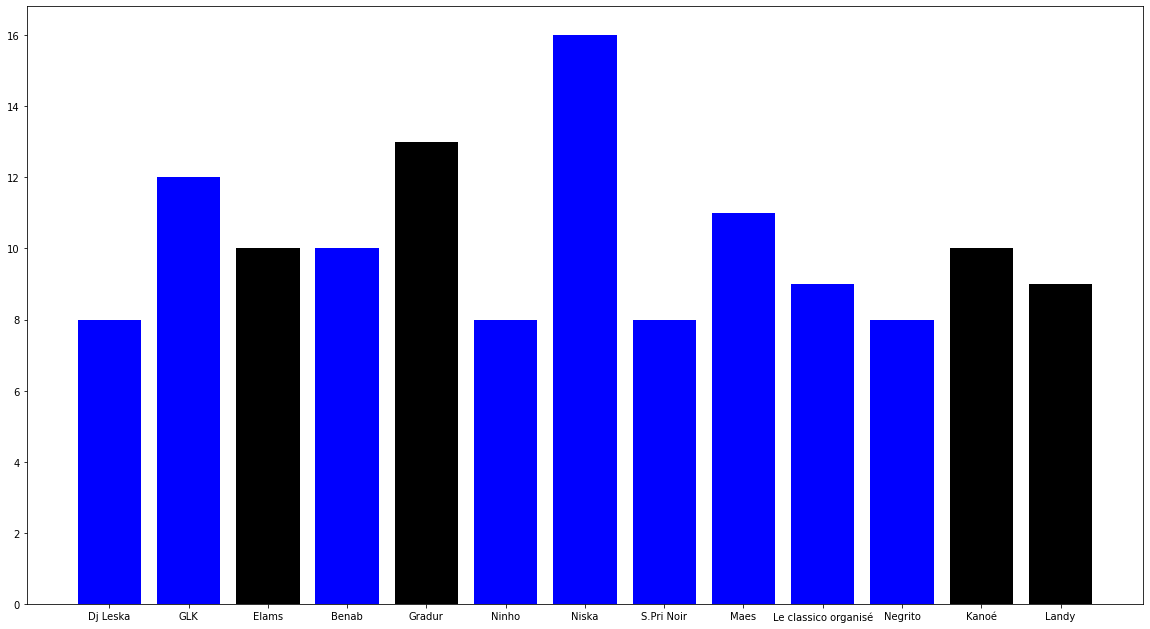

In [ ]:
import matplotlib.pyplot as plt

keys = popurbaine_7.keys()
values = popurbaine_7.values()
w = 20
h = 11

plt.figure(figsize=(w, h))
#the bars of artists whose radios are being looked at are coloured black since
#they are expected to have high frequency in their own radios
plt.bar(keys, values, color=['blue', 'blue', 'black', 'blue', 'black', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'black', 'black'])

Thirty two artists appear once in the radio which shows that the radio is introducing the user to a wide range of aritsts/tracksw. However, 13 artists appear 7 or more time which shows that they are put forward frequently by the recommendation algorithm. 

We have distinguished between artists whose radios we were considering, given that by design they would tend to appear more often. Thus, removing the bars in black from the sample we consider here, we see 9 artists who are recommended 7 or more times. 

Analysing the radios of random artists from Who We Be

In [ ]:
freq_whowebe = count_radioartists(whoweberadio)
whowebe_once = artists_once(freq_whowebe)
whowebe_7 = artists_above_7(freq_whowebe)


print("The analysis of the radios linked to artists from Who We Be shows " + str(len(freq_whowebe)) + " artists in total from 250 tracks.")
print("There are " + str(len(whowebe_once)) + " artists that appear once.")
print("There are " + str(len(whowebe_7)) + " artists that appear more than 7 times.")


The analysis of the radios linked to artists from Who We Be shows 88 artists in total from 250 tracks.
There are 42 artists that appear once.
There are 9 artists that appear more than 7 times.


<BarContainer object of 9 artists>

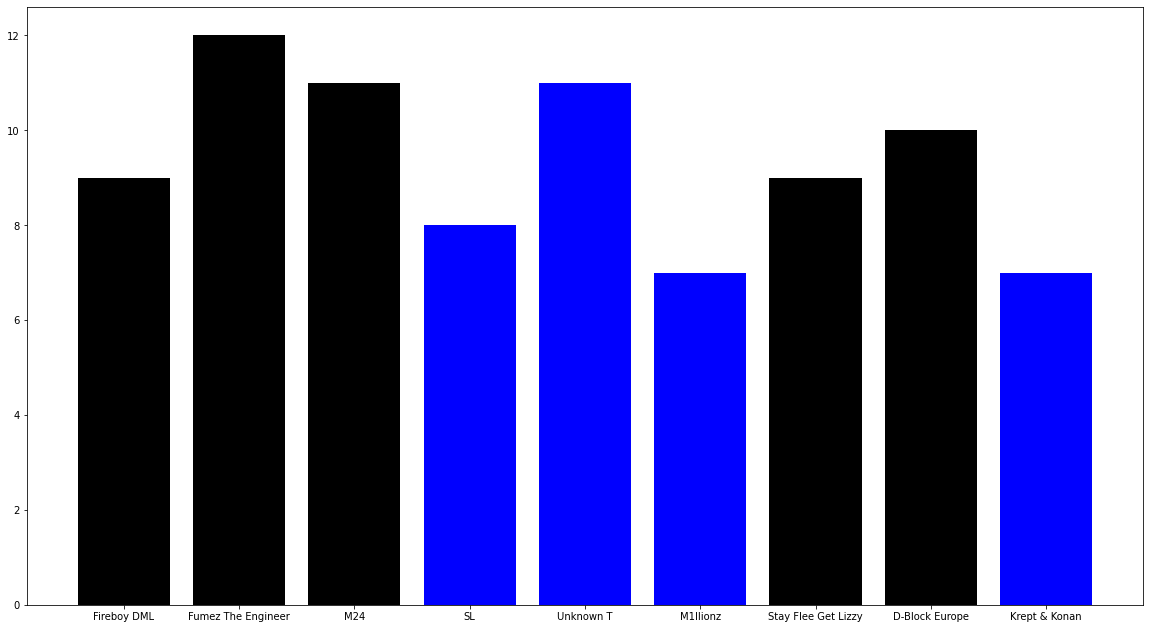

In [ ]:
keys = whowebe_7.keys()
values = whowebe_7.values()
w = 20
h = 11

plt.figure(figsize=(w, h))
#the bars of artists whose radios are being looked at are coloured black since
#they are expected to have high frequency in their own radios
plt.bar(keys, values, color=['black', 'black', 'black', 'blue', 'blue', 'blue', 'black', 'black','blue'])

Here we see that the algorithm significantly promotes 9 artists. By excluding the artists whose radios were considered, we see that 4 artists are particularly pushed forward by the algorithm.  

We now proceed to look into the French playlist Grand Hit, in order to determine whether Pop Urbaine is an outlier, or whether Spotify France naturally tends to promote established and popular artists. 

Analysing the radios of random artists from Grand Hit

In [ ]:
freq_grandhitradio = count_radioartists(grandhitradio)
grandhit_once = artists_once(freq_grandhitradio)
grandhit_7 = artists_above_7(freq_grandhitradio)


print("The analysis of the radios linked to artists from Grand Hit shows " + str(len(freq_grandhitradio)) + " artists in total from 250 tracks.")
print("There are " + str(len(grandhit_once)) + " artists that appear once.")
print("There are " + str(len(grandhit_7)) + " artists that appear more than 7 times.")

The analysis of the radios linked to artists from Grand Hit shows 77 artists in total from 250 tracks.
There are 36 artists that appear once.
There are 9 artists that appear more than 7 times.


<BarContainer object of 9 artists>

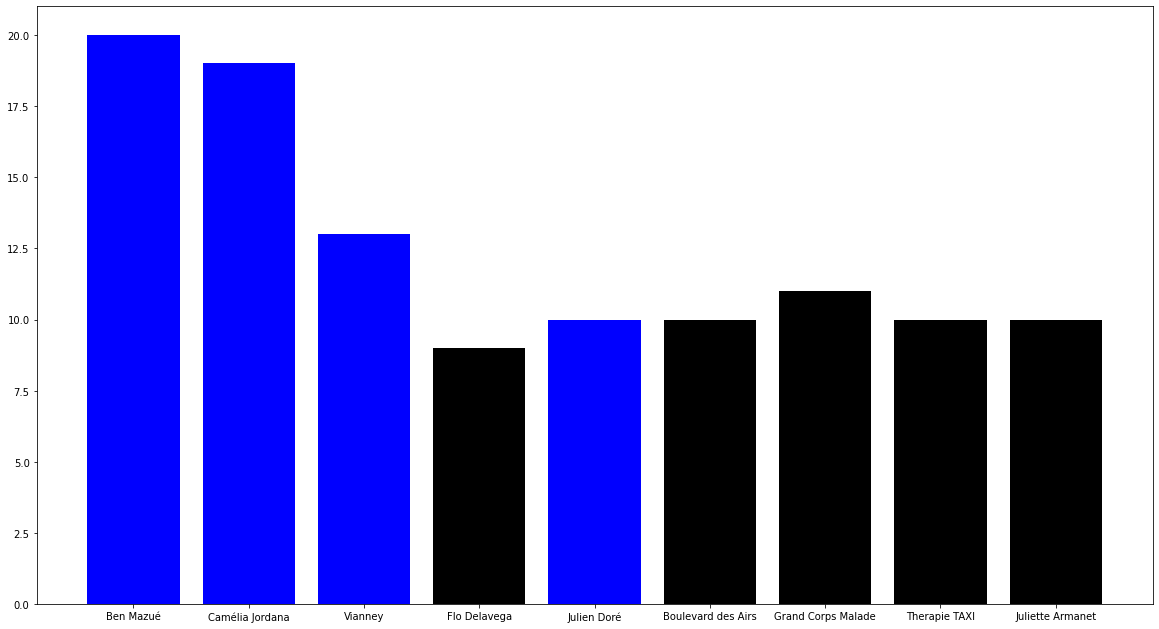

In [ ]:
keys = grandhit_7.keys()
values = grandhit_7.values()
w = 20
h = 11

plt.figure(figsize=(w, h))
#the bars of artists whose radios are being looked at are coloured black since
#they are expected to have high frequency in their own radios
plt.bar(keys, values, color=['blue', 'blue', 'blue', 'black', 'blue', 'black', 'black', 'black', 'black'])

Here we see that 9 artists are particularly being pushed forward by the algorithm. By excluding the artists' whose radios were considered, we can see that 4 artists are particularly being pushed forward by the algorithm. Two of them, Ben Mazué and Camélia Jordana, are overwhelmingly present, appearing almost 20 times.

### Takeaways:

Seeing that there are 42 artists who appear once in the UK radios, it signifies that there are new artists being introduced by radio, these artists are 10 more than the Pop Urbaine artist radios introduce. On the othe other hand, while both Pop Urbaine and Grand Hit seems to show a concentration of a few artists, the most recurring artist (Ben Mazue) in this section is far less popular than the artists in Pop Urbaine. The next step would thus be to see what the variance in popularity is of the artists who appear once or 7 times and more to show what kind of artists the algorithm puts forward.



# IV. Popularity across artists

Studying the popularity of artists associated with the radios of artists from Who We Be:

In [ ]:
pop_uk = pd.read_excel('Popularity UK.xlsx')

In [ ]:
pop_uk.head((10))

,Unnamed: 0,Artist,Radio,Popularity,Followers,Genre,Occurences
0,1,Fireboy DML,1,68,353705,"""afropop"",\n ""nigerian pop""",9
1,2,Fumez The Engineer,1,74,246184,"""uk drill"",\n ""uk melodic rap""",12
2,3,M24,1,65,87434,"""uk drill"",\n ""uk hip hop""",11
3,4,Unknown T,0,67,204485,"""uk alternative hip hop"",\n ""uk drill...",11
4,5,M1llionz,0,63,97215,"""uk alternative hip hop"",\n ""uk drill...",7
5,6,Stay Flee Get Lizzy,1,57,6471,"""nottingham hip hop"",\n ""uk drill"",\n...",9
6,7,D-Block Europe,1,75,520976,"""uk hip hop""",10
7,8,Krept & Konan,0,66,414429,"""grime"",\n ""uk hip hop""",7
8,9,SL,0,65,291749,"""uk hip hop""",8


In [ ]:
pop_uk['Popularity'].describe()

count     9.000000
mean     66.666667
std       5.454356
min      57.000000
25%      65.000000
50%      66.000000
75%      68.000000
max      75.000000
Name: Popularity, dtype: float64

In [ ]:
pop_uk['Followers '].describe()

count         9.000000
mean     246960.888889
std      167348.058093
min        6471.000000
25%       97215.000000
50%      246184.000000
75%      353705.000000
max      520976.000000
Name: Followers , dtype: float64

Here, we exclude artists whose radios we were considering, as it would make sense for them to appear more often within their own radios. We look at the popularity and following base of artists who were recommended by the algorithm. 

In [ ]:
promoted_uk = pop_uk.loc[pop_uk['Radio']==0] 

In [ ]:
promoted_uk['Popularity'].describe()

count     4.000000
mean     65.250000
std       1.707825
min      63.000000
25%      64.500000
50%      65.500000
75%      66.250000
max      67.000000
Name: Popularity, dtype: float64

In [ ]:
promoted_uk['Followers '].describe()

count         4.000000
mean     251969.500000
std      134386.545422
min       97215.000000
25%      177667.500000
50%      248117.000000
75%      322419.000000
max      414429.000000
Name: Followers , dtype: float64

Reccurring UK artists have and an average popularity of 66,7 an average following base of 246960,9. 
Once we exclude artists whose radio we were analysing, we can see that their popularity slighly decreases to 65.25, and an average following base of 251969. 

Studying the popularity of artists associated with the radios of artists from Pop Urbaine:

In [ ]:
pop_pop_urbaine = pd.read_excel('Pop Urbaine Popularity.xlsx')

In [ ]:
pop_pop_urbaine.head()

,Index,Artists,Radio,Popularity,Followers,Genre,Occurences
0,1,GLK,0,63,531600,"""francoton"",\n ""french hip hop"",\n ...",12
1,2,Elams,1,66,189371,"""francoton"",\n ""french hip hop"",\n ...",10
2,3,Benab,0,67,179120,"\n\n""francoton"",\n ""french hip hop"",\...",10
3,4,Gradur,1,65,1449830,"""francoton"",\n ""french hip hop"",\n ...",13
4,5,Niska,0,79,3873503,"""francoton"",\n ""french hip hop"",\n ...",16


In [ ]:
pop_pop_urbaine['Popularity'].describe()

count    13.000000
mean     67.769231
std       7.584566
min      58.000000
25%      63.000000
50%      66.000000
75%      74.000000
max      82.000000
Name: Popularity, dtype: float64

In [ ]:
pop_pop_urbaine['Followers'].describe()

count    1.300000e+01
mean     1.108293e+06
std      1.610315e+06
min      3.288700e+04
25%      1.790960e+05
50%      4.576380e+05
75%      1.449830e+06
max      5.105873e+06
Name: Followers, dtype: float64

Here, similar to the UK Playlist, we exclude artists whose radios we were considering.

In [ ]:
promoted_pop = pop_pop_urbaine.loc[pop_pop_urbaine['Radio']==0] 

In [ ]:
promoted_pop['Popularity'].describe()

count     9.000000
mean     69.444444
std       8.353309
min      59.000000
25%      63.000000
50%      67.000000
75%      75.000000
max      82.000000
Name: Popularity, dtype: float64

In [ ]:
promoted_pop['Followers'].describe()

count    9.000000e+00
mean     1.347950e+06
std      1.880708e+06
min      3.288700e+04
25%      1.790960e+05
50%      4.576380e+05
75%      1.736883e+06
max      5.105873e+06
Name: Followers, dtype: float64

Reccurring pop urbaine artists have an average popularity of 68 and an average following base of 1 million. Once we exclude artists whose radio we were analysing, we can see that their popularity slighly increases to 69.4, and an average following base of 1.3 million.

Studying the popularity of artists associated with the radios of artists from Grand Hit:

In [ ]:
pop_grandhit = pd.read_excel('Grand Hit Popularity.xlsx')

In [ ]:
pop_grandhit.head()

,Index,Radio,Popularity,Followers,Genre
0,Flo Delavega: 9,1,45,NaN,NaN
1,Boulevard des Airs: 10,1,55,163086.0,"""francoton"",\n ""french pop"",\n ..."
2,Grand Corps Malade: 11,1,66,439534.0,"""chanson"",\n ""francoton"",\n ..."
3,Therapie TAXI: 10,1,66,415830.0,"""french indie pop"",\n ""french pop"",\n..."
4,Juliette Armanet: 10,1,58,131143.0,"""chanson"",\n ""electro-pop francais"",\..."


In [ ]:
pop_grandhit['Popularity'].describe()

count     9.000000
mean     60.000000
std       6.892024
min      45.000000
25%      58.000000
50%      61.000000
75%      66.000000
max      66.000000
Name: Popularity, dtype: float64

In [ ]:
pop_grandhit['Followers'].describe()

count         8.00000
mean     351124.37500
std      261034.04842
min      118885.00000
25%      130010.25000
50%      289458.00000
75%      479203.00000
max      815695.00000
Name: Followers, dtype: float64

In [ ]:
promoted_hit = pop_grandhit.loc[pop_grandhit['Radio'] == 0]

In [ ]:
promoted_hit['Popularity'].describe()

count     4.000000
mean     62.500000
std       3.109126
min      59.000000
25%      60.500000
50%      62.500000
75%      64.500000
max      66.000000
Name: Popularity, dtype: float64

In [ ]:
promoted_hit['Followers'].describe()

count         4.000000
mean     414850.500000
std      348795.082865
min      118885.000000
25%      124680.250000
50%      362411.000000
75%      652581.250000
max      815695.000000
Name: Followers, dtype: float64

Reccurring Grand Hit artists have an average popularity of 60 and an average following base of 351 124. Once we exclude artists whose radio we were analysing, we can see that their popularity slighly increases to 62.5, and an average following base of 414850.

In [ ]:
# We combine our data within a same DataFrame called pop_dist in order to visualize the popularity distribution

pop_dist = pd.DataFrame(pop_uk['Followers '])
pop_dist= pop_dist.rename(columns={'Followers ': 'Who We Be'})
pop_followers = pop_pop_urbaine['Followers']
pop_dist['Pop Urbaine'] = pop_followers
hit_followers = pop_grandhit['Followers']
pop_dist['Grand Hit'] = hit_followers
pop_dist.head()

,Who We Be,Pop Urbaine,Grand Hit
0,353705,531600,NaN
1,246184,189371,163086.0
2,87434,179120,439534.0
3,204485,1449830,415830.0
4,97215,3873503,131143.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



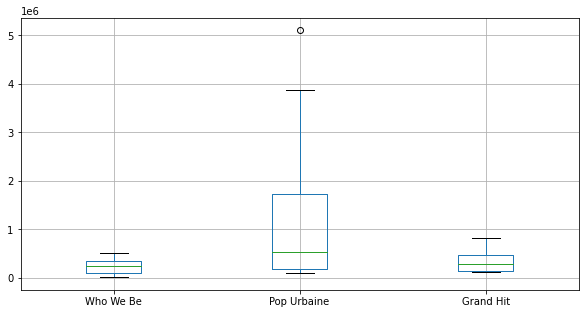

In [ ]:
boxplot = pop_dist.boxplot(column=['Who We Be', 'Pop Urbaine', 'Grand Hit'], figsize=(10,5))

### Takeaways:

Our analysis has shown that there is a difference in the concentration of popular artists present in Pop Urbaine compared to Who We Be and Grand Hit. The UK playlist contains nicher genres that more authentically categorise music and artists from the UK. On the other hand, while Grand Hit also contains the 'francoton' label, there is a larger variation in genres used to categorise the music here. Another curious point to note is that although the artists in Pop Urbaine have a higher popularity score than those in Grand Hit, many don't make it to the Grand Hit playlist. A possible conclusion to draw here is that these 'urban' artists are not seen as being palatable and 'mainstream'.

We found that in pop urbaine, the artists recommended the most by the algorithm were overwhelmingly more popular than the artist initially considered, but also significantly more popular than those recommended in the two other genres.

# Conclusions

Based on our analysis, the existing literature, and the guidelines provided by Spotify: it seems that when using broad categories such as pop or rock, and searching among a large pool of artists, the algorithm relies heavily on other users’ behaviour, which essentially acts as a proxy for popularity. Indeed, previous research has demonstrated that niche artists tend to thrive more within subgenres and narrower categories (Masters of Art, 2021). As it seems, the use of a catch-all categories negatively impacts nicher artists in the recommendation algorithm.   
Moreover, listeners’ habits are shaped by editorial playlists which have a higher concentration of recurring artists in Pop Urbaine compared to the other two playlists. This results in the creation a feedback loop that systematically favours already established artists. 

Concretely, the creation of such a broad category creates three implications for artists: 
* Niche artists are drowned in a larger pool of other artists, which will tend to heavily favour popular artists
* There is a heightened competition for incumbents and niche artists to gain visibility, which makes them dependent of the backing of established labels, virality,  or featuring with already well established artists. 
* More substantively, our study shows how a lack of understanding, and tendency to agglomerate artists around made-up racialized categories creates a form of disparate treatment, rewards commercial success, virality over creativity and experimentations. The use of the term pop urbaine enshrines a commercial logic which does not incentivize artists to innovate, while glorifying innovation and experimentation in other genres. 

**Ultimately, the debate over the use label "urban" is pertinent to be had in the French context as our study has demonstrated the concrete impact of the use of a broad label, who tend to be young artists of color.** 


The discussion section of our project draws broader conclusions from the analysis conducted in this notebook.